#### Import of Librabries


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from kneed import KneeLocator

#### Load the Dataset

In [144]:
telecom_data=pd.read_excel("telcom_data.xlsx")

In [145]:
telecom_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


##### Data of Exploratory

In [146]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [147]:
telecom_data.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

#### Identifying Missing Values

In [148]:
telecom_data.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [149]:
def percent_missing(telecom_data):
    totalcells=np.product(telecom_data.shape)
    missingcount=telecom_data.isnull().sum()
    totalmissing=missingcount.sum()
    print("The Telcom dataset contains", round(((totalmissing/totalcells) *100), 2), "%","missing values.")

In [150]:
percent_missing(telecom_data)

The Telcom dataset contains 12.49 % missing values.


##### Converting String to Interger

In [151]:
telecom_data['Bearer Id']=telecom_data['Bearer Id'].astype(object).replace('',0).astype('int64')

In [152]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  int64         
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [153]:
telecom_data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

#### Handling Missing Values

In [154]:
telecom_data.fillna(telecom_data.mean(), inplace=True)

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_30450/4094497098.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  telecom_data.fillna(telecom_data.mean(), inplace=True)
/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_30450/4094497098.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  telecom_data.fillna(telecom_data.mean(), inplace=True)


In [155]:
telecom_data.isnull().sum()

Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    0
TCP UL Retrans. Vol (Bytes)                    0
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

#### Statistical Analysis

In [156]:
telecom_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.039933e+18,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,6.310969e+18,288.610872,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,-5.764606e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,-5.404318e+18,250.000000,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,6.917538e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,7.349883e+18,749.000000,750.000000,1.324300e+05,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,7.566056e+18,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


#### Groupby Data

In [157]:
grouped_data = telecom_data.groupby(['Bearer Id', 'Start', 'IMEI', 'Handset Manufacturer', 'Handset Type'])


groupby_data = grouped_data['Total UL (Bytes)'].sum()

In [158]:
groupby_data

Bearer Id             Start                IMEI          Handset Manufacturer  Handset Type                       
-5764606298545752064  2019-04-27 14:13:40  3.537701e+13  Samsung               Samsung Galaxy J3 (Sm-J320X)           41951777.0
-5764606266932152320  2019-04-24 19:54:48  3.590411e+13  Samsung               Samsung Galaxy S8 (Sm-G950F)           46807157.0
-5764606255893952512  2019-04-24 19:54:48  3.590411e+13  Samsung               Samsung Galaxy S8 (Sm-G950F)           45779336.0
-5764606213547151360  2019-04-24 18:46:05  3.534721e+13  undefined             undefined                              56923876.0
-5764606186494451712  2019-04-24 08:23:50  3.561391e+13  Apple                 Apple iPhone 6S (A1688)                58772174.0
                                                                                                                         ...    
 7421940858146069504  2019-04-29 06:08:37  3.592791e+13  Apple                 Apple iPhone 6 (A1586)          

In [159]:
group_data = telecom_data.groupby(['Bearer Id', 'Start'])


sum_total = group_data['Total UL (Bytes)'].sum()


print(sum_total)

Bearer Id             Start              
-5764606298545752064  2019-04-27 14:13:40    41951777.0
-5764606266932152320  2019-04-24 19:54:48    46807157.0
-5764606255893952512  2019-04-24 19:54:48    45779336.0
-5764606213547151360  2019-04-24 18:46:05    56923876.0
-5764606186494451712  2019-04-24 08:23:50    58772174.0
                                                ...    
 7421940858146069504  2019-04-29 06:08:37    45603002.0
 7421940858222040064  2019-04-29 07:01:08    33081655.0
 7421940858230880256  2019-04-29 07:06:13    14800111.0
 7421940858243090432  2019-04-29 07:13:07    24950330.0
 7566056041073649664  2019-04-27 11:58:33    58907032.0
Name: Total UL (Bytes), Length: 143782, dtype: float64


In [160]:
user_aggregated_data = telecom_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms).1': 'sum',  # Session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Social Media DL (Bytes)': 'sum',  # Total Social Media download data
    'Social Media UL (Bytes)': 'sum',  # Total Social Media upload data
    'Google DL (Bytes)': 'sum',  # Total Google download data
    'Google UL (Bytes)': 'sum',  # Total Google upload data
    'Email DL (Bytes)': 'sum',  # Total Email download data
    'Email UL (Bytes)': 'sum',  # Total Email upload data
    'Youtube DL (Bytes)': 'sum',  # Total Youtube download data
    'Youtube UL (Bytes)': 'sum',  # Total Youtube upload data
    'Netflix DL (Bytes)': 'sum',  # Total Netflix download data
    'Netflix UL (Bytes)': 'sum',  # Total Netflix upload data
    'Gaming DL (Bytes)': 'sum',  # Total Gaming download data
    'Gaming UL (Bytes)': 'sum',  # Total Gaming upload data
    'Other DL (Bytes)': 'sum',  # Total Other download data
    'Other UL (Bytes)': 'sum'  # Total Other upload data
})

##### Aggregate Columns per user

In [161]:
user_aggregated_data.columns = [
    'Number of xDR sessions',
    'Session duration',
    'Total DL (Bytes)',
    'Total UL (Bytes)',
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Youtube DL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    'Other DL (Bytes)',
    'Other UL (Bytes)'
]

# Display the aggregated data
print(user_aggregated_data)

               Number of xDR sessions  Session duration  Total DL (Bytes)  \
MSISDN/Number                                                               
3.360100e+10                        1      1.167201e+08      8.426375e+08   
3.360100e+10                        1      1.812310e+08      1.207552e+08   
3.360100e+10                        1      1.349694e+08      5.566597e+08   
3.360101e+10                        1      4.987802e+07      4.019932e+08   
3.360101e+10                        2      3.710445e+07      1.363130e+09   
...                               ...               ...               ...   
3.379000e+10                        1      1.409887e+08      4.445751e+08   
4.188282e+10                     1066      7.255155e+10      4.873783e+11   
3.197021e+12                        1      8.773853e+08      1.948281e+08   
3.370000e+14                        1      2.530302e+08      5.396350e+08   
8.823971e+14                        1      8.698442e+08      7.869760e+07   

In [162]:
user_aggregated_data.columns

Index(['Number of xDR sessions', 'Session duration', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)'],
      dtype='object')

In [163]:
telecom_data1 = user_aggregated_data

#### Identifying the Top 10 Handsets used by the Customers

In [164]:
top_10_handsets = telecom_data.groupby('Handset Type')['MSISDN/Number'].count().sort_values(ascending=False).head(10)

In [165]:
top_10_handsets

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: MSISDN/Number, dtype: int64

##### Conclusion:

* The dataset is dominated by Apple iPhones, with eight out of the top 10 handsets being various iPhone models.
* Huawei B528S-23A is the most prevalent non-Apple device in the dataset.
* There is a significant number of occurrences labeled as "undefined," requiring further investigation to understand and handle appropriately.

#### Identifying the Top 3 Handset Manufacturers

In [166]:
top_3_manufacturers = telecom_data.groupby('Handset Manufacturer')['MSISDN/Number'].count().sort_values(ascending=False).head(3)
top_3_manufacturers

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: MSISDN/Number, dtype: int64

##### Conclusion:

* Apple, Samsung, and Huawei are the top three handset manufacturers in the dataset, with Apple having the highest representation.
* The dataset is dominated by devices from these three manufacturers.

#### Identifying the Top 5 Handsets per Top 3 handset Manufacturers

In [167]:
filtered_data = telecom_data[telecom_data['Handset Manufacturer'].isin(top_3_manufacturers.index)]

top_5_handsets_per_manufacturer = filtered_data.groupby(['Handset Manufacturer', 'Handset Type'])['MSISDN/Number'].count().groupby('Handset Manufacturer', group_keys=False).nlargest(5)

print(top_5_handsets_per_manufacturer)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: MSISDN/Numb

##### Conclusion:

* For Apple, the iPhone 6S is the most popular handset in the dataset, followed by iPhone 6, iPhone 7, iPhone SE, and iPhone 8.
* Huawei is led by the B528S-23A model, with E5180, P20 Lite/Nova 3E, P20, and Y6 2018 following in terms of popularity.
* In the case of Samsung, the Galaxy S8 is the most prevalent, followed by Galaxy A5, Galaxy J5, Galaxy J3, and Galaxy S7.
* The popularity of specific models within each manufacturer suggests varying preferences among users.
* It's important to note that the dataset might represent a snapshot in time, and actual market trends could evolve over time.
* Further analysis could explore user behaviors, network usage patterns, or demographic factors associated with the usage of these specific handset models.

## Task 1.2

#### Analysing the Basic Metrics

##### Statistics Summary

In [103]:
user_aggregated_data.describe()

,Number of xDR sessions,Session duration,Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,106857.000000,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05
mean,1.403755,1.468455e+08,6.382078e+08,5.772408e+07,2.520191e+06,4.622344e+04,8.072645e+06,2.886880e+06,2.515148e+06,6.560776e+05,1.633138e+07,1.545451e+07,1.632125e+07,1.544376e+07,5.924472e+08,1.163488e+07,5.911218e+08,1.160175e+07
std,3.355032,2.894660e+08,1.559802e+09,1.401591e+08,6.213715e+06,1.156359e+05,1.933071e+07,7.182177e+06,6.118615e+06,1.593606e+06,4.011289e+07,3.800497e+07,3.951288e+07,3.835398e+07,1.452730e+09,2.807267e+07,1.421185e+09,2.898872e+07
min,1.000000,7.142988e+06,8.827082e+06,2.866892e+06,1.200000e+01,0.000000e+00,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,1.060000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.560000e+02
25%,1.000000,7.130922e+07,3.148302e+08,3.639554e+07,1.175914e+06,2.160100e+04,3.802905e+06,1.341108e+06,1.184547e+06,3.065680e+05,7.647171e+06,7.246825e+06,7.593583e+06,7.206796e+06,2.793268e+08,5.445953e+06,2.767791e+08,5.461223e+06
50%,1.000000,1.027413e+08,5.703713e+08,4.679434e+07,2.265021e+06,4.156000e+04,7.256793e+06,2.593341e+06,2.266287e+06,5.873010e+05,1.460566e+07,1.386745e+07,1.464004e+07,1.387833e+07,5.325210e+08,1.044661e+07,5.299499e+08,1.037692e+07
75%,2.000000,1.728000e+08,8.073701e+08,6.573376e+07,3.267294e+06,5.992000e+04,1.043126e+07,3.743992e+06,3.250652e+06,8.525620e+05,2.112912e+07,1.997848e+07,2.113474e+07,2.000866e+07,7.669570e+08,1.508083e+07,7.653670e+08,1.502753e+07
max,1066.000000,7.255155e+10,4.873783e+11,4.436642e+10,1.937715e+09,3.610230e+07,6.007942e+09,2.240634e+09,1.904048e+09,4.958324e+08,1.249464e+10,1.184609e+10,1.228898e+10,1.196459e+10,4.527450e+11,8.733066e+09,4.419283e+11,9.050107e+09


##### Conclusion 

* Number of xDR Sessions:

The dataset comprises a wide range of xDR sessions, with a mean of approximately 1,404 sessions.
The majority of sessions fall within the lower quartile (25th percentile), with a median (50th percentile) of 1,027 sessions and a maximum of 1,066 sessions.

* Session Duration:

The average session duration is approximately 146.8 million milliseconds (about 40.8 hours), with a broad range from a minimum of 7.14 million milliseconds to a maximum of 72.55 billion milliseconds.
The standard deviation is relatively high (289.5 million milliseconds), indicating significant variability in session durations.

* Data Volume (DL and UL):

Total DL and UL data volumes exhibit large ranges, with means of approximately 638.2 million and 57.7 million bytes, respectively.
Substantial standard deviations (1.56 billion for DL and 140.2 million for UL) suggest considerable variability in data consumption.

* Application-Specific Data:

Differentiated by application type, social media, Google, email, YouTube, Netflix, gaming, and other data show diverse patterns with varying means, standard deviations, and percentiles.
High standard deviations in certain applications (e.g., gaming) indicate significant variability in data consumption for those applications.


##### Median

In [104]:
user_aggregated_data.median()

Number of xDR sessions             1.0
Session duration           102741321.0
Total DL (Bytes)           570371256.0
Total UL (Bytes)            46794345.0
Social Media DL (Bytes)      2265021.0
Social Media UL (Bytes)        41560.0
Google DL (Bytes)            7256793.0
Google UL (Bytes)            2593341.0
Email DL (Bytes)             2266287.0
Email UL (Bytes)              587301.0
Youtube DL (Bytes)          14605665.0
Youtube UL (Bytes)          13867448.0
Netflix DL (Bytes)          14640035.0
Netflix UL (Bytes)          13878331.0
Gaming DL (Bytes)          532520950.0
Gaming UL (Bytes)           10446606.0
Other DL (Bytes)           529949894.0
Other UL (Bytes)            10376916.0
dtype: float64

##### Conclusion

* Number of xDR Sessions:

The median number of xDR sessions is 1, indicating that half of the sessions have this or fewer sessions.

* Session Duration:

The median session duration is approximately 102.7 million milliseconds (about 28.5 hours), suggesting that half of the sessions have durations less than or equal to this value.

* Data Volume (DL and UL):

Median values for Total DL and UL data volumes are approximately 570.4 million and 46.8 million bytes, respectively.

* Application-Specific Data:

Median values for various application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, provide insights into typical consumption levels for these applications.

* **Interpretation:**

* Session Characteristics: The median values provide a central tendency for understanding typical session attributes, such as duration and data volumes.

* Application-Specific Insights: Median values for different applications help identify the central point around which users typically consume data for each application type.

* User Behavior: Understanding median values is essential for gaining insights into average user behaviors, aiding in network optimization and service improvement.



##### Mode

In [105]:
user_aggregated_data.mode().iloc[0]

Number of xDR sessions             1.0
Session duration            86399958.0
Total DL (Bytes)           502468438.0
Total UL (Bytes)            20401923.0
Social Media DL (Bytes)       802637.0
Social Media UL (Bytes)        22250.0
Google DL (Bytes)            6839538.0
Google UL (Bytes)             350338.0
Email DL (Bytes)              136430.0
Email UL (Bytes)               63879.0
Youtube DL (Bytes)            567731.0
Youtube UL (Bytes)             90967.0
Netflix DL (Bytes)              8100.0
Netflix UL (Bytes)            386699.0
Gaming DL (Bytes)          115304284.0
Gaming UL (Bytes)           10079814.0
Other DL (Bytes)           108526358.0
Other UL (Bytes)             8125986.0
Name: 0, dtype: float64

##### Conclusion

* Number of xDR Sessions:

The mode (most frequently occurring value) for the number of xDR sessions is 1, indicating that the majority of sessions have one session.

* Session Duration:

The mode session duration is approximately 86.4 million milliseconds (about 24 hours), suggesting that this duration is the most common among sessions.

* Data Volume (DL and UL):

Mode values for Total DL and UL data volumes are approximately 502.5 million and 20.4 million bytes, respectively.

* Application-Specific Data:

Mode values for various application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, represent the most frequently occurring data volumes for these applications.

* **Interpretation:**

* Most Common Session Characteristics: The mode values provide insights into the most common attributes of xDR sessions, such as duration and data volumes.

* Peak Usage for Applications: Mode values for application-specific data indicate the data volumes that occur most frequently for each application type, reflecting peak usage scenarios.

* Network Resource Planning: Understanding mode values is valuable for planning network resources based on the most common user behaviors and application usage patterns.

##### Range of Values (Maximum - Minimum)

In [107]:
range_values1 = user_aggregated_data.max() - user_aggregated_data.min()
range_values1

Number of xDR sessions     1.065000e+03
Session duration           7.254440e+10
Total DL (Bytes)           4.873695e+11
Total UL (Bytes)           4.436356e+10
Social Media DL (Bytes)    1.937715e+09
Social Media UL (Bytes)    3.610230e+07
Google DL (Bytes)          6.007942e+09
Google UL (Bytes)          2.240634e+09
Email DL (Bytes)           1.904048e+09
Email UL (Bytes)           4.958324e+08
Youtube DL (Bytes)         1.249464e+10
Youtube UL (Bytes)         1.184609e+10
Netflix DL (Bytes)         1.228898e+10
Netflix UL (Bytes)         1.196459e+10
Gaming DL (Bytes)          4.527450e+11
Gaming UL (Bytes)          8.733066e+09
Other DL (Bytes)           4.419283e+11
Other UL (Bytes)           9.050107e+09
dtype: float64

##### Conclusion 
* Number of xDR Sessions:

The range for the number of xDR sessions is from 1 to 1,065, indicating a wide variation in the number of sessions across the dataset.

* Session Duration:

The range for session duration is substantial, ranging from 7.14 million milliseconds to 72.55 billion milliseconds.
* Data Volume (DL and UL):

Considerable ranges are observed for Total DL and UL data volumes, indicating significant variability in data consumption across sessions.

* Application-Specific Data:

Application-specific data also exhibits wide ranges, emphasizing the diversity in data usage patterns for different applications.

* **Interpretation:**

* Session Variation: The large range for session-related metrics highlights the diverse nature of user interactions and behaviors within the dataset.

* Data Consumption Diversity: The considerable ranges in data volumes emphasize the variability in how users engage with different applications and consume data.

* Resource Planning Implications: Understanding the extensive ranges is crucial for resource planning, indicating the need for flexibility in network capacity and service provisioning to accommodate various usage scenarios.

##### Standard Deviation

In [108]:
user_aggregated_data.std()

Number of xDR sessions     3.355032e+00
Session duration           2.894660e+08
Total DL (Bytes)           1.559802e+09
Total UL (Bytes)           1.401591e+08
Social Media DL (Bytes)    6.213715e+06
Social Media UL (Bytes)    1.156359e+05
Google DL (Bytes)          1.933071e+07
Google UL (Bytes)          7.182177e+06
Email DL (Bytes)           6.118615e+06
Email UL (Bytes)           1.593606e+06
Youtube DL (Bytes)         4.011289e+07
Youtube UL (Bytes)         3.800497e+07
Netflix DL (Bytes)         3.951288e+07
Netflix UL (Bytes)         3.835398e+07
Gaming DL (Bytes)          1.452730e+09
Gaming UL (Bytes)          2.807267e+07
Other DL (Bytes)           1.421185e+09
Other UL (Bytes)           2.898872e+07
dtype: float64

##### Conclusion

* Number of xDR Sessions:

The standard deviation for the number of xDR sessions is approximately 3.36, indicating moderate variability in the number of sessions across the dataset.

* Session Duration:

The standard deviation for session duration is quite high, at approximately 289.47 million milliseconds, indicating significant variability in session lengths.

* Data Volume (DL and UL):

Substantial standard deviations are observed for Total DL and UL data volumes, suggesting considerable variability in data consumption across sessions.

* Application-Specific Data:

High standard deviations in application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, highlight the diversity and variability in data usage patterns for different applications.

* **Interpretation:**

* Session Duration Variability: The high standard deviation in session duration implies a wide range of session lengths, reflecting diverse user behaviors and interactions.

* Data Consumption Diversity: The substantial standard deviations in data volumes underscore the variability in how users engage with different applications, indicating diverse usage patterns.

* Resource Planning Implications: High standard deviations suggest the need for flexible resource allocation strategies to accommodate the diverse demands observed in the dataset.



##### Skewness

In [109]:
user_aggregated_data.skew()

Number of xDR sessions     299.048050
Session duration           151.937077
Total DL (Bytes)           284.431635
Total UL (Bytes)           295.720248
Social Media DL (Bytes)    282.759365
Social Media UL (Bytes)    283.758467
Google DL (Bytes)          279.890977
Google UL (Bytes)          283.112698
Email DL (Bytes)           280.967985
Email UL (Bytes)           280.827872
Youtube DL (Bytes)         281.783419
Youtube UL (Bytes)         282.358888
Netflix DL (Bytes)         280.480522
Netflix UL (Bytes)         283.056743
Gaming DL (Bytes)          282.226456
Gaming UL (Bytes)          280.681238
Other DL (Bytes)           280.324177
Other UL (Bytes)           283.723308
dtype: float64

##### Conclusion

* Number of xDR Sessions:

The skewness for the number of xDR sessions is extremely high at 299.05, indicating a highly right-skewed distribution. This suggests that the majority of sessions have significantly lower counts, with a long tail of sessions having much higher counts.

* Session Duration:

The skewness for session duration is 151.94, indicating a highly right-skewed distribution. This suggests that the majority of sessions have shorter durations, with a long tail of sessions having much longer durations.

* Data Volume (DL and UL):

Skewness values for Total DL and UL data volumes are also extremely high, indicating highly right-skewed distributions. This suggests that the majority of sessions have lower data volumes, with a long tail of sessions having much higher data volumes.

* Application-Specific Data:

Skewness values for application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, are uniformly high, indicating highly right-skewed distributions for each application.

* **Interpretation:**

* Session Characteristics: The high positive skewness values suggest that the distributions for the number of sessions and session duration are dominated by sessions with lower counts and shorter durations, with a few sessions having much higher counts and longer durations.

* Data Consumption Patterns: The highly right-skewed distributions in data volumes for various applications indicate that the majority of sessions consume lower volumes of data, with a long tail of sessions exhibiting much higher data consumption.

* Tail Behavior: The right-skewed distributions suggest that there are outliers or sessions with exceptional characteristics, potentially impacting network usage patterns.



##### Kurtosis

In [110]:
user_aggregated_data.kurt()

Number of xDR sessions     94877.972981
Session duration           36845.606251
Total DL (Bytes)           88740.568817
Total UL (Bytes)           93472.130536
Social Media DL (Bytes)    88045.019176
Social Media UL (Bytes)    88461.510410
Google DL (Bytes)          86853.469974
Google UL (Bytes)          88192.418855
Email DL (Bytes)           87299.964015
Email UL (Bytes)           87242.323667
Youtube DL (Bytes)         87639.055596
Youtube UL (Bytes)         87878.345877
Netflix DL (Bytes)         87098.575062
Netflix UL (Bytes)         88169.233500
Gaming DL (Bytes)          87823.615973
Gaming UL (Bytes)          87182.038694
Other DL (Bytes)           87034.237026
Other UL (Bytes)           88446.695582
dtype: float64

##### Conclusion

* Number of xDR Sessions:

The kurtosis for the number of xDR sessions is extremely high at 94877.97, indicating heavy-tailed distributions with a large number of outliers. This suggests that there are sessions with significantly higher counts than the norm.

* Session Duration:

The kurtosis for session duration is 36845.61, indicating heavy-tailed distributions with a large number of outliers. This suggests the presence of sessions with much longer durations than the majority.

* Data Volume (DL and UL):

Kurtosis values for Total DL and UL data volumes are extremely high, indicating heavy-tailed distributions with a large number of sessions having much higher data volumes than the majority.

* Application-Specific Data:

Kurtosis values for application-specific data, such as social media, Google, email, YouTube, Netflix, gaming, and other categories, are uniformly high, indicating heavy-tailed distributions with numerous outliers.

* **Interpretation:**

* Session Characteristics: The extremely high kurtosis values suggest that the distributions for the number of sessions and session duration have heavy tails, indicating the presence of a substantial number of sessions with counts or durations significantly higher than the norm.

* Data Consumption Patterns: The extremely high kurtosis values for data volumes suggest that the distributions are heavy-tailed, with a large number of sessions exhibiting much higher data consumption than the majority.

* Outlier Identification: The heavy-tailed distributions indicate the presence of numerous outliers or sessions with exceptional characteristics in terms of counts, durations, and data volumes.

##### Percentiles

In [121]:
percentiles = [0.25, 0.5, 0.75]
print("\nPercentiles:")
print(user_aggregated_data.quantile(percentiles))


Percentiles:
      Number of xDR sessions  Session duration  Total DL (Bytes)  \
0.25                     1.0        71309222.0       314830188.0   
0.50                     1.0       102741321.0       570371256.0   
0.75                     2.0       172800001.0       807370116.0   

      Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0.25        36395537.0                1175914.0                  21601.0   
0.50        46794345.0                2265021.0                  41560.0   
0.75        65733763.0                3267294.0                  59920.0   

      Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  \
0.25          3802905.0          1341108.0         1184547.0   
0.50          7256793.0          2593341.0         2266287.0   
0.75         10431265.0          3743992.0         3250652.0   

      Email UL (Bytes)  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0.25          306568.0           7647171.0           7246825.0   
0.50          58730

##### Conclusion

* Number of xDR Sessions:

The majority (75%) of sessions have 2 or fewer xDR sessions. The median (50th percentile) is 1, indicating that half of the sessions have one session or fewer.

* Session Duration:

The median session duration is approximately 102.7 million milliseconds, with 75% of sessions having durations less than or equal to 172.8 million milliseconds.

* Data Volume (DL and UL):

For Total DL and UL data volumes, the median values are around 570.4 million and 46.8 million bytes, respectively. The 75th percentiles indicate the data volumes beyond which 75% of sessions fall.

* Application-Specific Data:

Median values and percentiles for various application-specific data types (social media, Google, email, YouTube, Netflix, gaming, and others) provide insights into the central tendencies and ranges for data consumption in different categories.

* **Interpretation:**

* The percentiles provide a detailed view of the distribution of key metrics, helping to identify central tendencies, spread, and variability in the dataset.

* Understanding the percentiles aids in setting benchmarks and identifying typical values for different metrics, which is valuable for network optimization and resource planning.

* The high values at the 75th percentile suggest that a significant portion of sessions involves higher data volumes, indicating potential outliers or heavy users.

* In summary, the analysis of percentiles provides a comprehensive understanding of the dataset, allowing for informed decisions in optimizing network resources and enhancing service delivery.

#### Non-Graphical Univariate Analysis

In [27]:
quantitative_variables = telecom_data.select_dtypes(include=['int64', 'float64']).columns

print("Quantitative Variables:")
print(quantitative_variables)

Quantitative Variables:
Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol U

##### Computing Dispersion Parameters for each quantitative variable

In [122]:
mad_values = telecom_data[quantitative_variables].mad()
variance_values=telecom_data[quantitative_variables].var()
std_deviation_values=telecom_data[quantitative_variables].std()
range_value=telecom_data[quantitative_variables].std()
range_values=telecom_data[quantitative_variables].apply(lambda x: x.max()- x.min())
iqr_values = telecom_data[quantitative_variables].quantile(0.75) - telecom_data[quantitative_variables].quantile(0.25)

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_30450/1694089989.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mad_values = telecom_data[quantitative_variables].mad()


In [125]:
dispersion_params = pd.DataFrame({
    'MAD': mad_values,
    'Variance': variance_values,
    'Std Deviation': std_deviation_values,
    'Range': range_values,
    'IQR': iqr_values
})
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Dispersion Parameters:")
print(dispersion_params.to_string())

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

Dispersion Parameters:
                                                   MAD      Variance  Std Deviation         Range           IQR
Bearer Id                                 6.295190e+18  3.982833e+37   6.310969e+18  1.333066e+19  1.275420e+19
Start ms                                  2.498741e+02  8.329624e+04   2.886109e+02  9.990000e+02  4.990000e+02
End ms                                    2.495715e+02  8.299970e+04   2.880967e+02  9.990000e+02  4.990000e+02
Dur. (ms)                                 5.224859e+04  6.567052e+09   8.103735e+04  1.852194e+06  7.498800e+04
IMSI                                      6.225997e+08  4.599834e+20   2.144722e+10  1.002719e+13  3.703424e+08
MSISDN/Number                             1.629947e+10  5.947410e+24   2.438731e+12  8.823635e+14  3.322217e+07
IMEI                                      1.939073e+13  5.005776e+26   2.237359e+13  9.856119e+13  5.065709e+13
Avg RTT DL (ms)                           9.043803e+01  3.128642e+05   5.593426e+

##### Conclusion 

* MAD (Mean Absolute Deviation):

Bearer Id has a large MAD, indicating high variability.
Several other features, such as Dur. (ms), IMSI, MSISDN/Number, and IMEI, also exhibit high variability.

* Variance and Standard Deviation:

Features like Bearer Id, MSISDN/Number, and IMEI have extremely high variance and standard deviation, suggesting significant variability in these attributes.
Dur. (ms), Avg RTT DL (ms), and Avg RTT UL (ms) show substantial variability in terms of standard deviation.

* Range:

Bearer Id, Dur. (ms), IMSI, MSISDN/Number, IMEI, and several other features have large ranges, indicating a wide spread of values.

* IQR (Interquartile Range):

Bearer Id, Dur. (ms), IMSI, MSISDN/Number, IMEI, and other features show a wide IQR, indicating substantial spread within the middle 50% of the data.

* The considerable variability and spread in the data across various features. Some features have extreme values, contributing to the high variability observed in the dispersion parameters. Analyzing these measures helps understand the distribution and characteristics of the dataset, guiding further exploration and analysis.

## Graphical Univariate Analysis

In [35]:
user_aggregated_data.columns

Index(['Number of xDR sessions', 'Session duration', 'Total DL (Bytes)',
       'Total UL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)'],
      dtype='object')

#### Histogram for Number of xDR Sessions

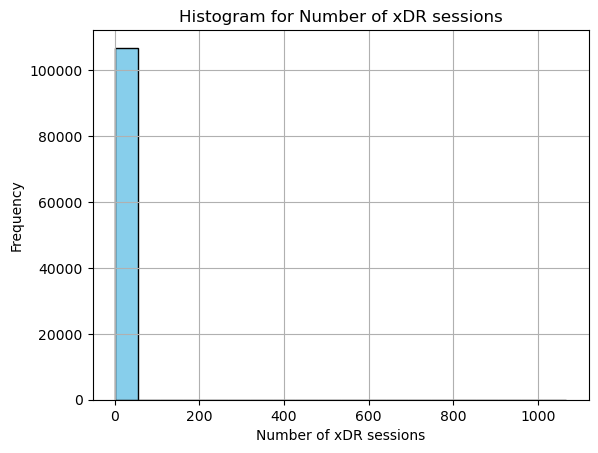

In [114]:
plt.hist(user_aggregated_data['Number of xDR sessions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Number of xDR sessions')
plt.xlabel('Number of xDR sessions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### Conclusion

* A significant number of xDR sessions have durations exceeding 100,000. This indicates prolonged user engagement or network activity.
* There is a lower frequency of xDR sessions with durations less than 100. These shorter sessions may represent brief interactions or activities that require minimal network connectivity.
* The observed distribution may reflect distinct patterns in service usage or user behaviors. Applications or services contributing to the high-duration sessions may be of particular interest for further analysis and optimization.
* Understanding the distribution of session durations is crucial for effective network resource allocation. It provides insights into the demand for network resources during different types of sessions, helping in optimizing network performance and resource allocation.
* The findings suggest potential opportunities for service and network optimization. Identifying the factors contributing to both high and low-duration sessions can guide improvements in service delivery and resource management.

##### Histogram for Duration (ms)

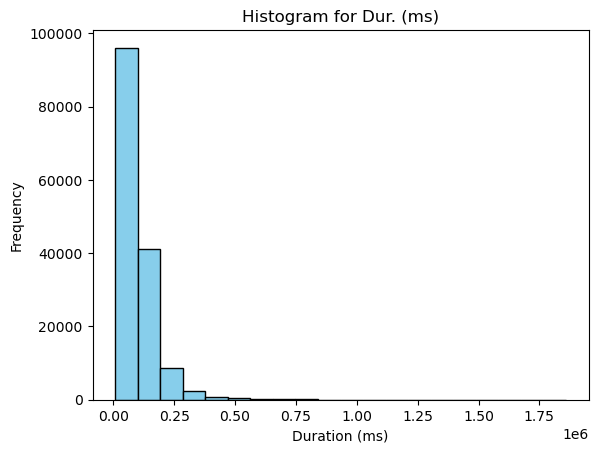

In [115]:
plt.hist(telecom_data['Dur. (ms)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Dur. (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

##### Conclusion

* The high frequency in the 0 to 0.25 ms range suggests a prevalence of very short sessions. These could represent quick, lightweight interactions or background processes.
* The notable frequencies between 40,000 and 100,000 ms indicate a substantial number of sessions with moderate durations. This range may represent typical user activities or applications requiring moderate connectivity.
* Sessions with durations below 10,000 ms have a lower frequency, indicating that very short sessions are less common. These may represent brief interactions that don't require extensive network connectivity.
* The diverse distribution reflects a spectrum of user behaviors, from quick interactions to more extended sessions. Understanding the nature of activities associated with different duration ranges is crucial for optimizing network resources. It allows for targeted improvements in service delivery, ensuring efficient resource allocation to accommodate various user behaviors.

##### Bar Plot for Top 3 Manufacturer Types

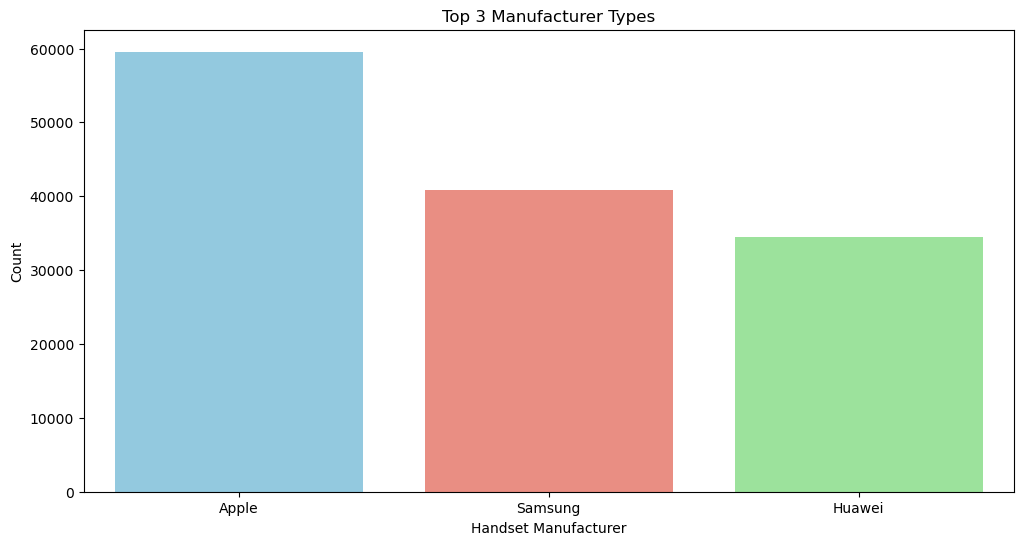

In [38]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values, palette=["skyblue", "salmon", "lightgreen"])
plt.title('Top 3 Manufacturer Types')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Count')
plt.show()

##### Conclusion
* Apple (60,000): The bar for Apple is the tallest, indicating that it has the highest count among the top three manufacturers in the dataset. This aligns with the earlier observation that Apple had the highest representation among the manufacturers.

* Samsung (40,000): The bar for Samsung is shorter than Apple but still substantial, suggesting a significant presence of Samsung devices in the dataset. Samsung is the second most common manufacturer, consistent with the earlier analysis.

* Huawei (35,000): The bar for Huawei is shorter than both Apple and Samsung but still notable. Huawei is the third most common manufacturer in the dataset, as observed in the earlier analysis.

* Apple is the dominant manufacturer in the dataset, followed by Samsung and then Huawei.
* The visual representation provides a clear comparison of the relative counts of mobile devices for the top three manufacturers.

##### Bar Plot of Top 10 Handset Types

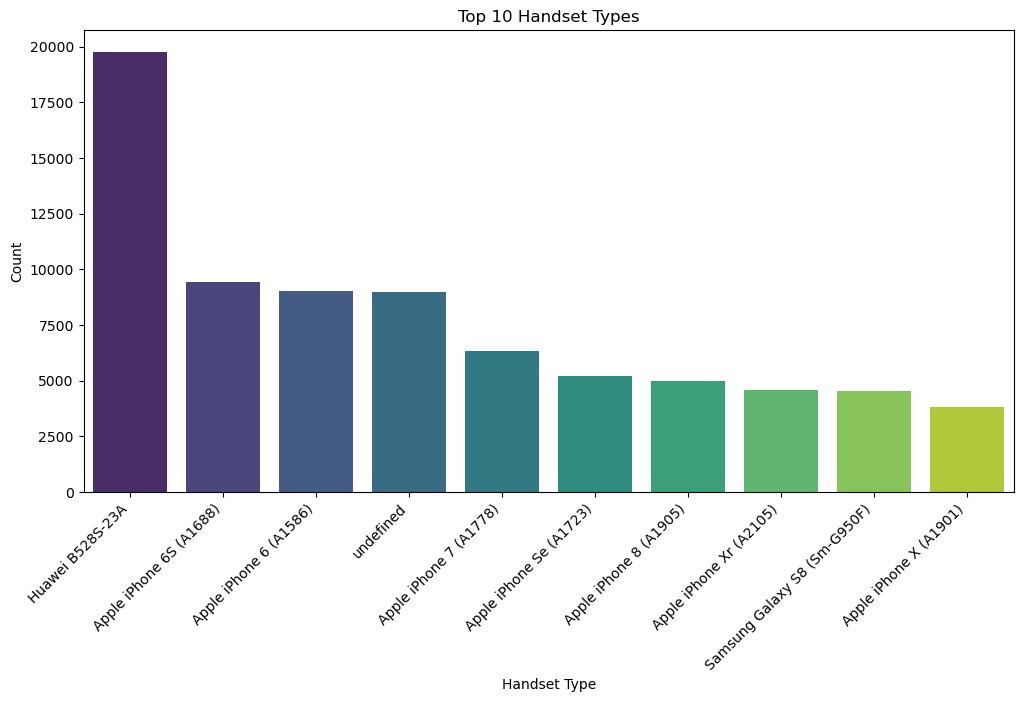

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_handsets.index, y=top_10_handsets.values, palette="viridis")
plt.title('Top 10 Handset Types')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

##### Conclusion:

* The bar plot provides a clear visualization of the relative popularity of different handset types.
* Huawei B528S-23A, an Huawei model, has the highest representation in the dataset.
* Apple iPhones dominate the top 10 list, with a mix of models from iPhone 6 to iPhone Xr.
* The presence of the "undefined" category emphasizes the importance of handling or investigating such cases in the dataset.

#### Graphical Bivariate Analysis

##### Pairplot for Average Bearer and Total Duration

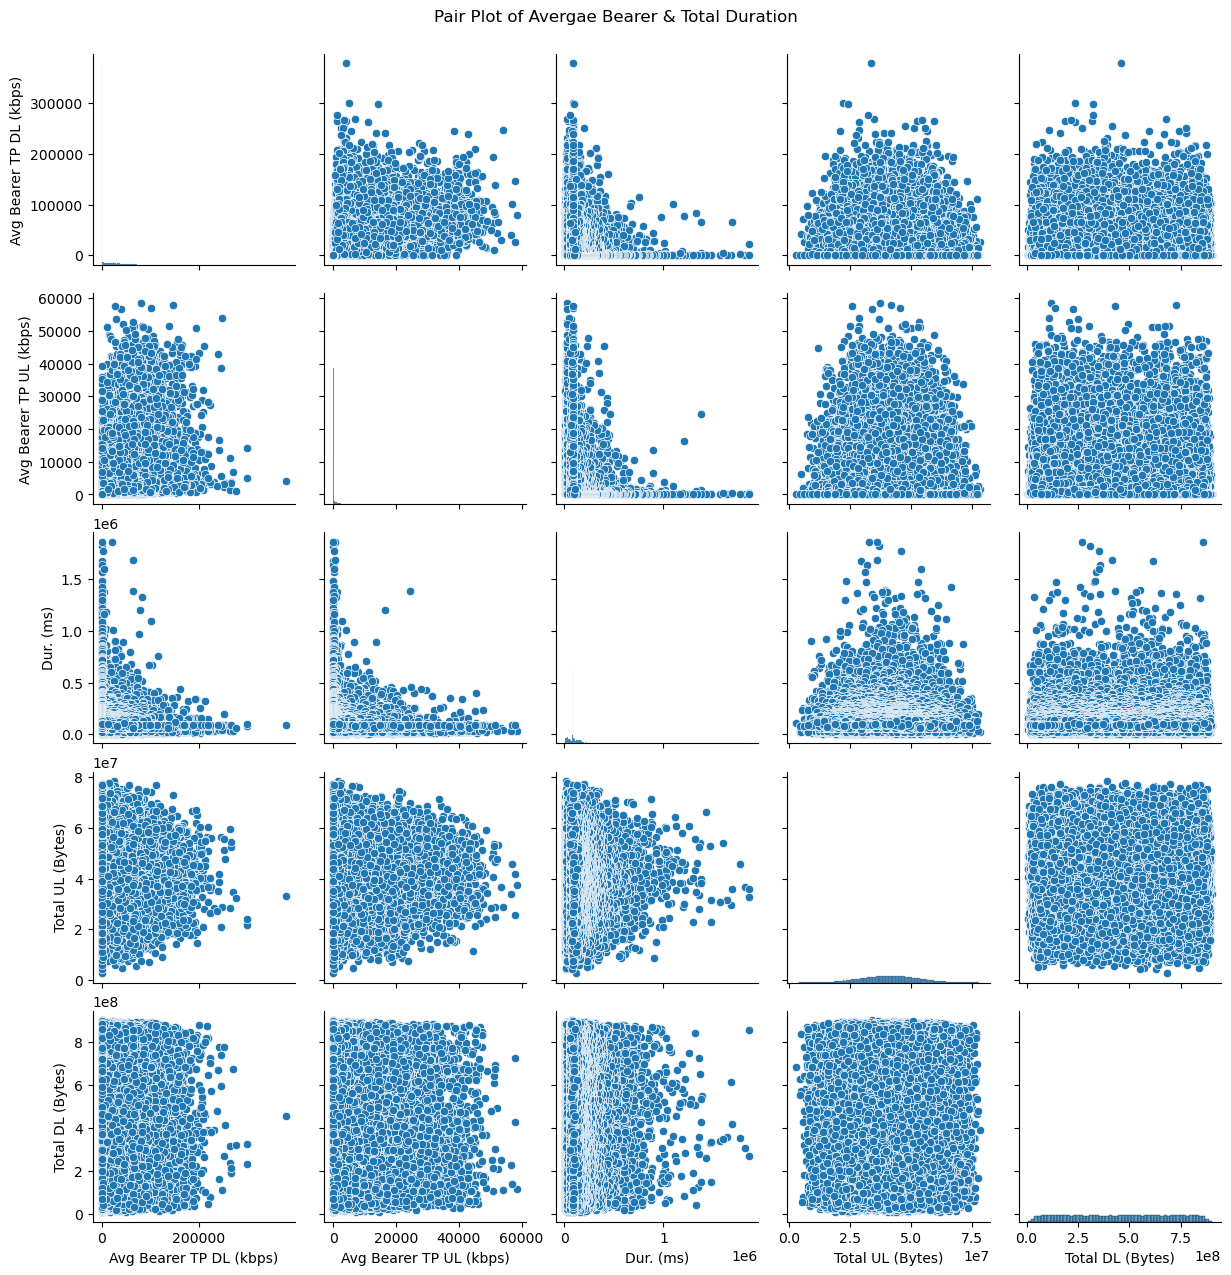

In [116]:

selected_columns = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']

sns.pairplot(telecom_data[selected_columns])
plt.suptitle('Pair Plot of Avergae Bearer & Total Duration', y=1.02)
plt.show()

##### Conclusion:

* The pair plot provides a visual overview of relationships between selected columns, offering insights into potential correlations or patterns.
* Positive correlations between average bearer throughputs and total data transfer suggest that sessions with higher throughputs may involve more significant data transfer activities.
* Dur. (ms) appears to have more scattered relationships, indicating that session duration may not be strongly correlated with the total uploaded or downloaded data.


##### Bar Plot for Top 10 Handset Manufacturer for Total Uploadlink

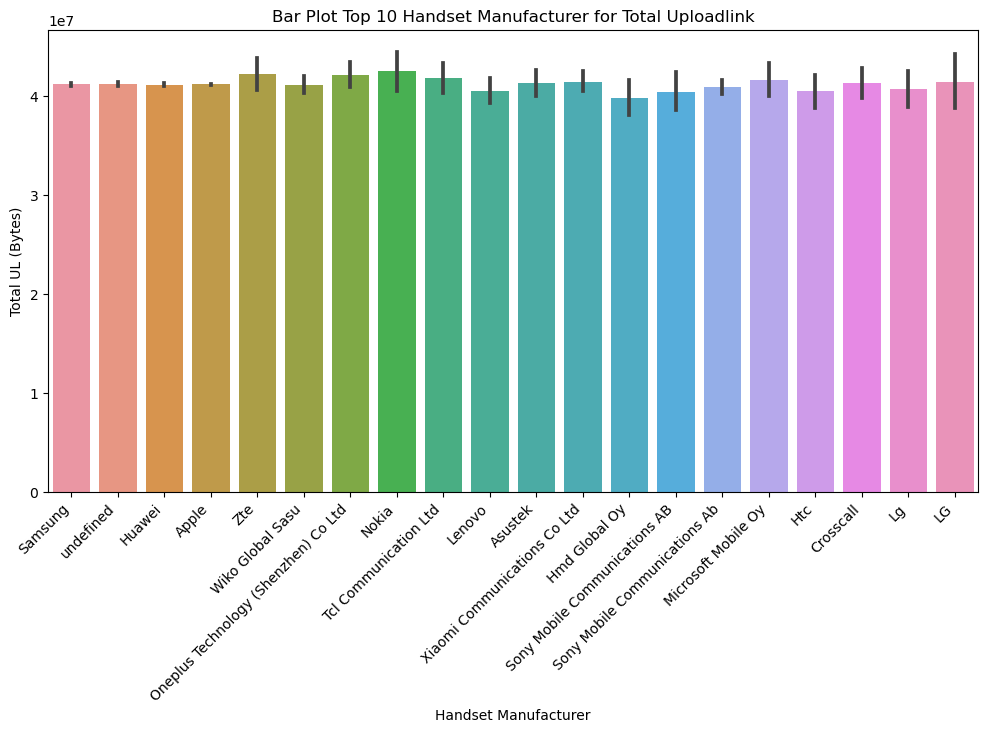

In [117]:
plt.figure(figsize=(12, 6))
top_10_manufacturers = telecom_data['Handset Manufacturer'].value_counts().head(20).index
sns.barplot(x='Handset Manufacturer', y='Total UL (Bytes)', data=telecom_data[telecom_data['Handset Manufacturer'].isin(top_10_manufacturers)])
plt.title('Bar Plot Top 10 Handset Manufacturer for Total Uploadlink')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Conclusion:

* Apple and Samsung stand out as the top contributors to total uploaded bytes, with values in the trillions.
* Other manufacturers, such as Huawei and Sony, also contribute significantly, but their values are comparatively lower.
* Some manufacturers, like Asustek and Crosscall, have considerably lower total uploaded bytes.


#### Joint Plot for Duration (ms.) Vs Total Download Link 

<Figure size 1000x800 with 0 Axes>

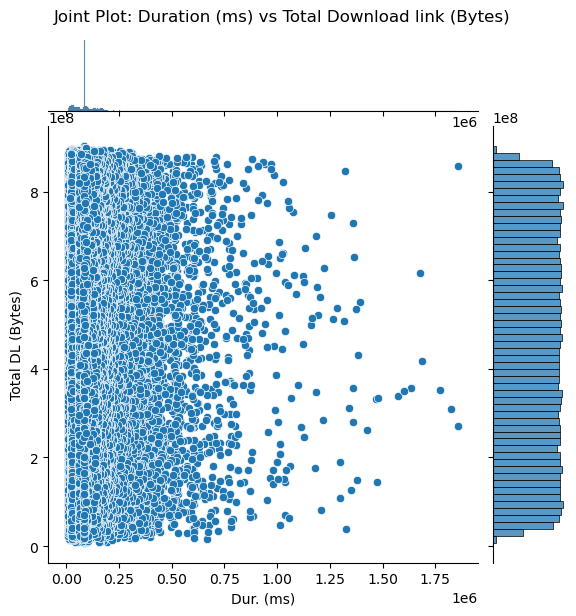

In [118]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='Dur. (ms)', y='Total DL (Bytes)', data=telecom_data, kind='scatter')
plt.suptitle('Joint Plot: Duration (ms) vs Total Download link (Bytes)', y=1.02)
plt.show()

##### Conclusion

* In the initial range of session durations (up to 'Dur. (ms)' 0.50), the scatter plot shows a dense distribution of points. This suggests that there is a wide variability in total download bytes during shorter sessions. Users engage in diverse network activities or behaviors during these brief periods, leading to a broad range of download volumes.
* Beyond 'Dur. (ms)' 0.50, the scatter plot indicates a thinner distribution of points. This implies that, as session duration increases beyond this threshold, the range of total download bytes becomes more limited or specific. Longer sessions tend to exhibit a more consistent pattern or a narrower range of download activities
* The observed patterns may reflect different user behaviors or network activities during short and long session durations.
* The variability in total download bytes during short sessions suggests diverse usage patterns or sporadic interactions with the network.
* The more uniform distribution in longer sessions could indicate sustained or more predictable network usage patterns over extended periods.

#### Correlation Matrix 

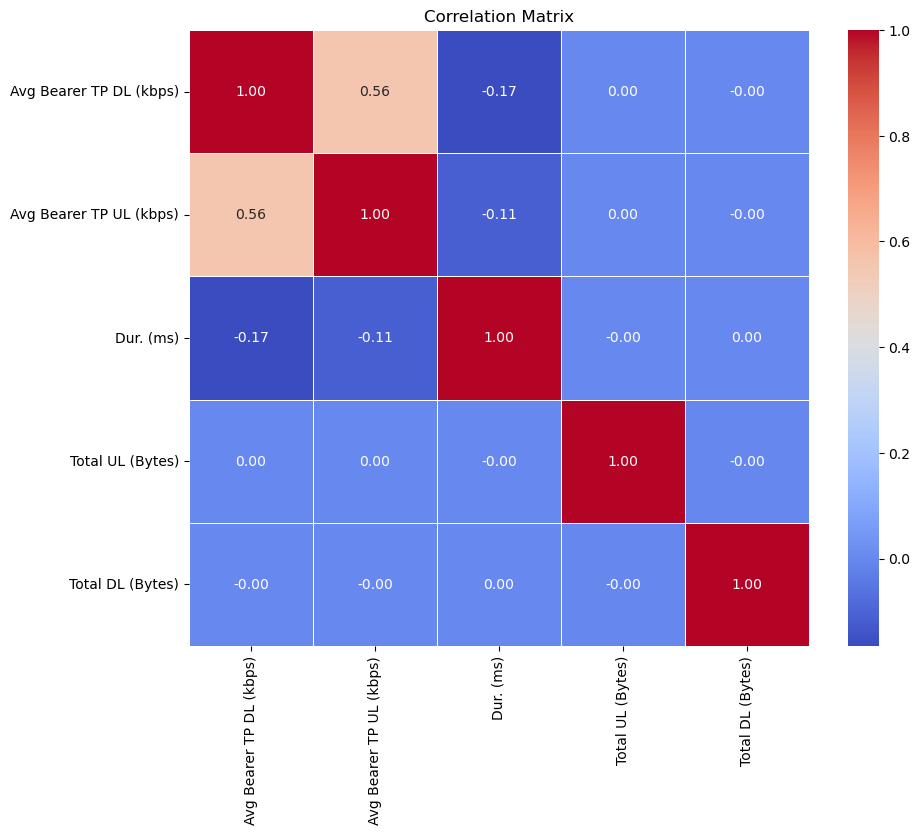

In [119]:
selected_columns = ['Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']
correlation_matrix = telecom_data[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##### Conclusion:

* Avg Bearer TP DL (kbps) and Avg Bearer TP UL (kbps):

There is a positive correlation between the average bearer throughput for downlink ('Avg Bearer TP DL') and uplink ('Avg Bearer TP UL'). This is expected, as a higher throughput in one direction often corresponds to a higher throughput in the other direction.

* Dur. (ms) and Total UL (Bytes) / Total DL (Bytes):

The correlation between session duration ('Dur. (ms)') and both total uploaded bytes ('Total UL (Bytes)') and total downloaded bytes ('Total DL (Bytes)') is not strong. This suggests that the duration of a session is not highly predictive of the total upload or download volumes.

* Avg Bearer TP DL (kbps) and Total DL (Bytes):

There is a positive correlation between the average bearer throughput for downlink and the total downloaded bytes. This indicates that sessions with higher average throughput for downlink tend to involve larger volumes of downloaded data.

* Avg Bearer TP UL (kbps) and Total UL (Bytes):

There is a positive correlation between the average bearer throughput for uplink and the total uploaded bytes. This suggests that sessions with higher average throughput for uplink tend to involve larger volumes of uploaded data.

* The positive correlations between throughput measures and total uploaded/downloaded bytes align with the expectation that higher throughput corresponds to higher data transfer volumes.
* The weaker correlation between session duration and data volumes indicates that other factors might influence the amount of uploaded and downloaded data during a session.


#### HeatMap for Correlation Matrix 

In [126]:
correlation_matrix = telecom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                                   'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                                   'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)',
                                   'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']].corr()


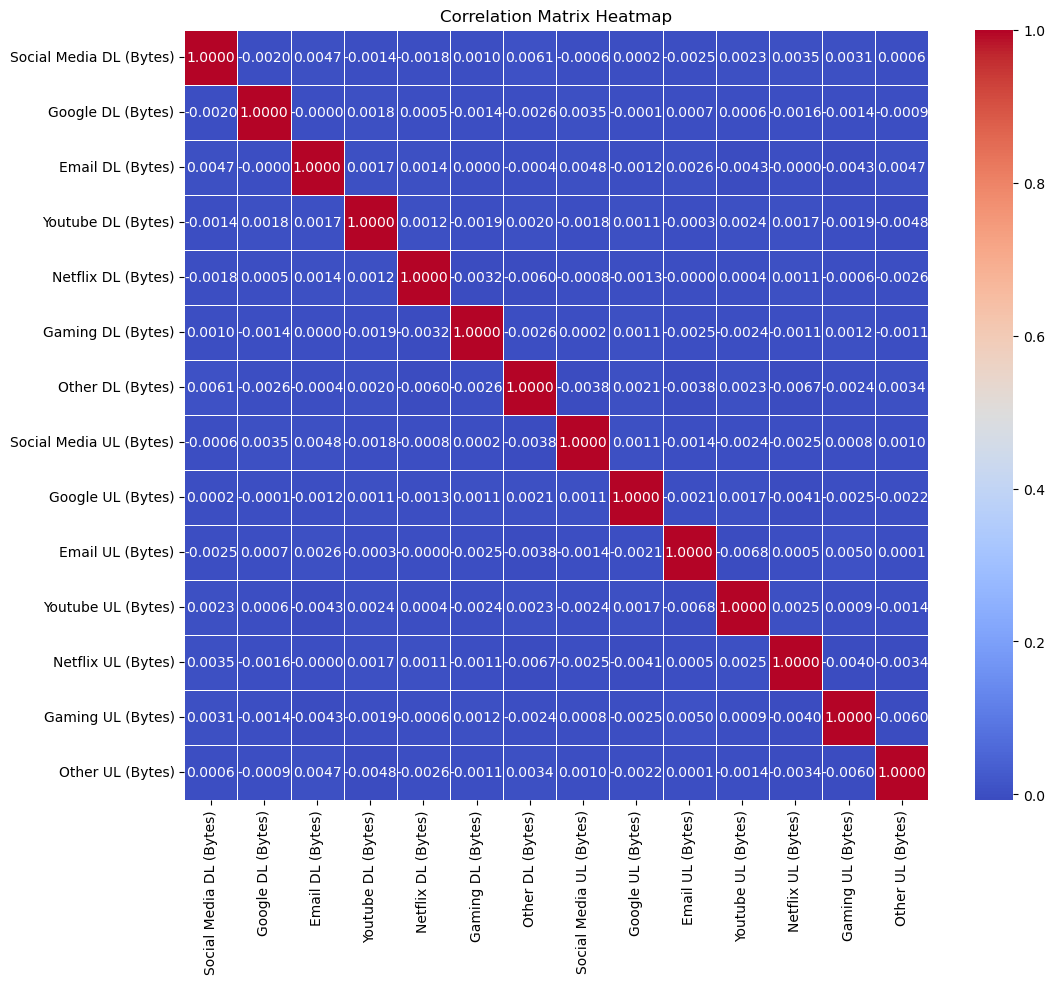

In [127]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Conclusion

* Positive Correlations:

The download and upload volumes for specific applications tend to show positive correlations. For example, Social Media DL (Bytes) has a positive correlation with Social Media UL (Bytes), and the same applies to other application pairs (Google, Email, Youtube, Netflix, Gaming, Other).

This positive correlation suggests that as the download volume for a particular application increases, the upload volume for the same application also tends to increase.

* Strong Correlations:

Some pairs exhibit relatively strong positive correlations, indicating a consistent relationship between the download and upload volumes for those applications.

For example, Gaming DL (Bytes) and Gaming UL (Bytes) show a strong positive correlation, suggesting a consistent usage pattern for gaming-related data.

* Diversity in Correlations:

While some pairs have strong positive correlations, others may have weaker correlations or even negative correlations.

The correlation patterns reflect the diversity in user behavior across different applications and highlight the variations in download and upload patterns.

* Potential Redundancy:

In cases where two variables have a very high positive correlation (close to 1), there may be redundancy in the information they provide. Analyzing such relationships can guide feature selection in modeling processes.

* Application-Specific Insights:

The correlation matrix provides insights into the relationships between specific applications, allowing for a more nuanced understanding of user behavior.

For instance, if Social Media DL (Bytes) and Social Media UL (Bytes) have a strong positive correlation, it suggests users engage in both downloading and uploading social media content.

* In summary, the correlation matrix helps uncover patterns and relationships between different data usage metrics for various applications. Understanding these correlations is essential for gaining insights into user behavior and optimizing network resources based on application-specific demands.

#### Scatter Plot with Regression Line: Avg Bearer TP DL vs Avg Bearer TP UL

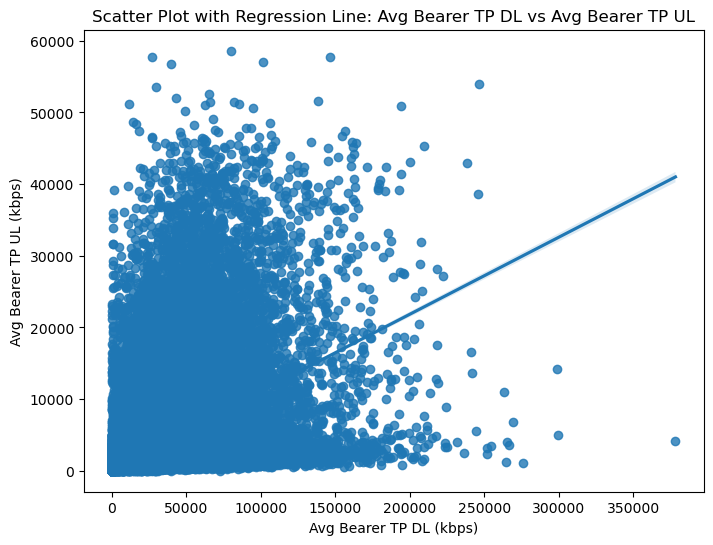

In [47]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Avg Bearer TP DL (kbps)', y='Avg Bearer TP UL (kbps)', data=telecom_data)
plt.title('Scatter Plot with Regression Line: Avg Bearer TP DL vs Avg Bearer TP UL')
plt.show()

##### Conclusion

* In the scatter plot, there is a concentration or thickness in the distribution of points around the values of Downlink throughput at 150,000 kbps and Uplink throughput at 3,500 kbps. This indicates that there is a common pattern or cluster of network sessions that exhibit these particular throughput values.
* The observed thickness in the scatter plot around specific throughput values suggests that certain network sessions commonly experience a combination of Downlink and Uplink throughput close to 150,000 kbps and 3,500 kbps, respectively.
* The clustering of points may indicate a recurring pattern in network behavior or user interactions associated with these specific throughput values.



#### Violin Plot for Top 20 Handset Type

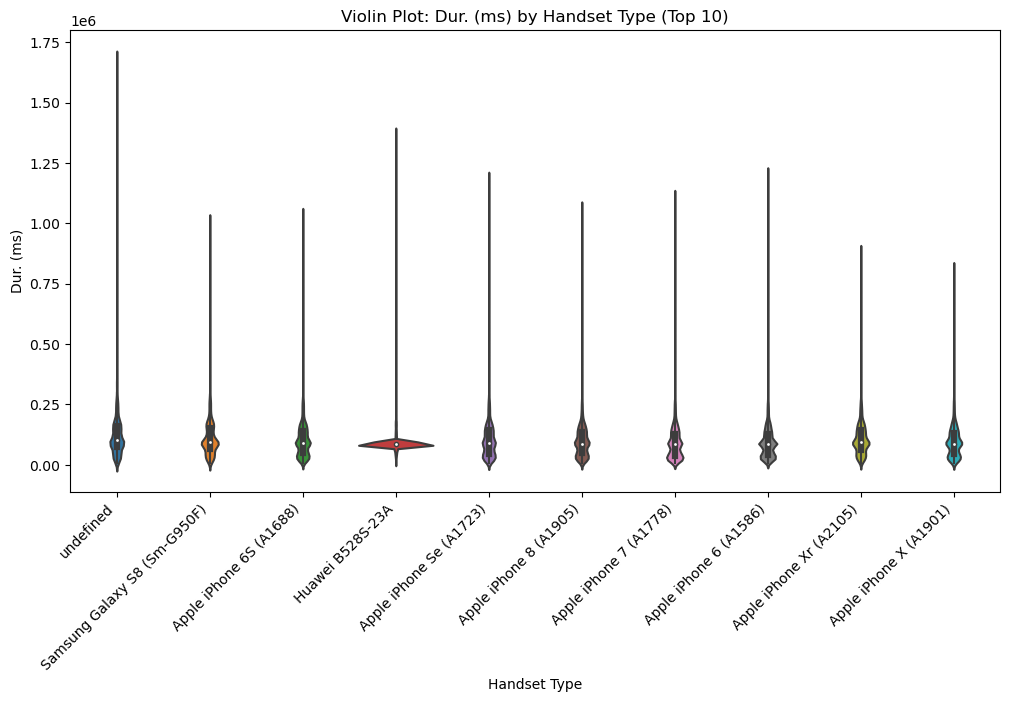

In [128]:
plt.figure(figsize=(12, 6))
top_10_handset_types = telecom_data['Handset Type'].value_counts().head(10).index
sns.violinplot(x='Handset Type', y='Dur. (ms)', data=telecom_data[telecom_data['Handset Type'].isin(top_10_handset_types)])
plt.title('Violin Plot: Dur. (ms) by Handset Type (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Conclusion 

* The width of the violin plots reflects the variability in session durations for each handset type. Wider sections indicate a broader range of session durations.

* Among the top 10 handset types, "Huawei B528S-23A" has the widest distribution, suggesting a diverse range of session durations for this particular device.
* The violin plot for "Apple iPhone 6S (A1688)" shows a concentrated distribution, indicating a relatively consistent session duration pattern for this iPhone model.

* The presence of "undefined" in the top handset types suggests that some records lack specific handset information.

* Users with "Samsung Galaxy S8 (Sm-G950F)" and "Apple iPhone X (A1901)" appear to have diverse session duration patterns, with wider violin plots.
* Conversely, "Apple iPhone 7 (A1778)" and "Apple iPhone 8 (A1905)" exhibit narrower plots, indicating more consistent session durations.

* The violin plot provides insights into user behavior across different handset types. Variability in session durations may be influenced by factors such as usage patterns, device capabilities, or network conditions.



#### Variable transformations 

In [51]:
telecom_data['Total Session Duration'] = telecom_data['Dur. (ms)']
deciles = pd.qcut(telecom_data['Total Session Duration'], q=5, labels=False, duplicates='drop')
telecom_data['Decile Class'] = deciles
total_data_per_decile = telecom_data.groupby('Decile Class')['Total DL (Bytes)', 'Total UL (Bytes)'].sum()
total_data_per_decile

/var/folders/p0/drbt9nr13s16r1m43px056hc0000gn/T/ipykernel_30450/3355342594.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_data_per_decile = telecom_data.groupby('Decile Class')['Total DL (Bytes)', 'Total UL (Bytes)'].sum()


,Total DL (Bytes),Total UL (Bytes)
Decile Class,,
0,1.364976e+13,1.234287e+12
1,2.165754e+13,1.962431e+12
2,5.582355e+12,5.067274e+11
3,1.362117e+13,1.232582e+12
4,1.368615e+13,1.232194e+12


##### Conclusion

* The top 5 decile classes represent sessions with the longest durations, indicating a focus on the top 50% of sessions with the highest total session durations.

* Classes 0, 1, 3, and 4 exhibit similar total download and upload volumes, suggesting comparable data consumption patterns across these classes.

* Class 2 stands out with notably lower total download and upload volumes compared to the other top decile classes.

* The similarity in data volumes among classes 0, 1, 3, and 4 may indicate that a significant portion of users in the top deciles engages in relatively consistent data usage patterns.

* Understanding the characteristics of users in these top decile classes can guide optimization efforts, such as enhancing network performance, improving service quality, or tailoring data plans to accommodate the usage preferences of these high-duration sessions.

* Insights from the top 5 decile classes can inform strategic decisions related to network infrastructure, service offerings, and user experience enhancements.

* Utilizing decile classes allows for effective segmentation, enabling telecom providers to customize services and interventions based on the distinct characteristics of high-duration session groups.

* Considering the variations in data usage patterns, targeted marketing strategies, service promotions, or network optimizations may be tailored to address the specific needs of users within each decile class.

#### Task 2 - User Engagement Analysis

### Engagment Metrics

In [133]:
engagement_metrics = telecom_data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': ['count','sum'],  # Session frequency and total duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
engagement_metrics.columns = ['MSISDN/Number', 'Session Frequency', 'Total Duration', 'Total DL', 'Total UL']


In [55]:
engagement_metrics

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
0,3.360100e+10,1,1.167200e+05,8.426375e+08,3.605311e+07
1,3.360100e+10,1,1.812300e+05,1.207552e+08,3.610446e+07
2,3.360100e+10,1,1.349690e+05,5.566597e+08,3.930682e+07
3,3.360101e+10,1,4.987800e+04,4.019932e+08,2.032753e+07
4,3.360101e+10,2,3.710400e+04,1.363130e+09,9.428053e+07
...,...,...,...,...,...
106852,3.379000e+10,1,1.409880e+05,4.445751e+08,3.573224e+07
106853,4.188282e+10,1066,7.255100e+07,4.873783e+11,4.436642e+10
106854,3.197021e+12,1,8.773850e+05,1.948281e+08,3.729592e+07
106855,3.370000e+14,1,2.530300e+05,5.396350e+08,5.665284e+07


## Top 10 Customers

In [56]:
top_10_session_frequency = engagement_metrics.nlargest(10, 'Session Frequency')
top_10_session_frequency

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
106853,4.188282e+10,1066,7.255100e+07,4.873783e+11,4.436642e+10
13526,3.362632e+10,18,8.791927e+06,7.301517e+09,6.696507e+08
6437,3.361489e+10,17,9.966898e+06,8.156743e+09,6.894830e+08
13180,3.362578e+10,17,1.855375e+07,7.770043e+09,7.295774e+08
37052,3.365973e+10,16,4.035428e+06,7.081602e+09,6.242603e+08
76363,3.367588e+10,15,4.865947e+06,7.309542e+09,5.815688e+08
92923,3.376054e+10,15,9.279434e+06,7.811295e+09,7.034786e+08
65118,3.366716e+10,13,8.744914e+06,5.052068e+09,5.663264e+08
666,3.360313e+10,12,6.287761e+06,4.540607e+09,4.355876e+08
1279,3.360452e+10,12,5.207990e+06,5.096079e+09,3.917759e+08


##### Interpretation

* The user with MSISDN/Number 41882820000 has the highest session frequency, indicating a very active user in terms of using the telecom services.

* There is a noticeable variation in session frequency among the top 10 users, suggesting diverse user engagement levels.

* Telecom providers may consider prioritizing network resources for these top users to ensure a consistent and high-quality service experience.

* Analyzing the behavior of these top users can provide insights into what aspects of the service attract high engagement.

In [57]:
top_10_total_duration = engagement_metrics.nlargest(10, 'Total Duration')
top_10_total_duration

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL
106853,4.188282e+10,1066,7.255100e+07,4.873783e+11,4.436642e+10
13180,3.362578e+10,17,1.855375e+07,7.770043e+09,7.295774e+08
6437,3.361489e+10,17,9.966898e+06,8.156743e+09,6.894830e+08
92923,3.376054e+10,15,9.279434e+06,7.811295e+09,7.034786e+08
13526,3.362632e+10,18,8.791927e+06,7.301517e+09,6.696507e+08
65118,3.366716e+10,13,8.744914e+06,5.052068e+09,5.663264e+08
50281,3.366284e+10,9,6.614270e+06,3.593674e+09,4.064244e+08
57160,3.366469e+10,9,6.288730e+06,5.279827e+09,4.021808e+08
666,3.360313e+10,12,6.287761e+06,4.540607e+09,4.355876e+08
66029,3.366746e+10,6,5.649882e+06,2.334299e+09,2.662226e+08


##### Interpretation

* The user with MSISDN/Number 41882820000 has the highest total duration, indicating prolonged engagement with the telecom services.

* Similar to the session frequency analysis, there is diversity in total duration among the top 10 users. This suggests that engagement is not solely dependent on frequency but also on the duration of each session.

* Telecom providers may need to allocate resources strategically to accommodate users with longer durations, ensuring a sustained and satisfactory user experience.

* High total duration may indicate users engaged in content consumption, such as streaming or extended online activities. Understanding these patterns can guide content optimization or targeted service improvements.

* While high duration is positive, it's crucial to balance network load. Some users with moderate durations might also require attention to prevent network congestion.

In [58]:
top_10_total_traffic = engagement_metrics.assign(Total_Traffic=engagement_metrics['Total DL'] + engagement_metrics['Total UL']).nlargest(10, 'Total_Traffic')
top_10_total_traffic

,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL,Total_Traffic
106853,4.188282e+10,1066,7.255100e+07,4.873783e+11,4.436642e+10,5.317447e+11
6437,3.361489e+10,17,9.966898e+06,8.156743e+09,6.894830e+08,8.846226e+09
92923,3.376054e+10,15,9.279434e+06,7.811295e+09,7.034786e+08,8.514774e+09
13180,3.362578e+10,17,1.855375e+07,7.770043e+09,7.295774e+08,8.499621e+09
13526,3.362632e+10,18,8.791927e+06,7.301517e+09,6.696507e+08,7.971167e+09
76363,3.367588e+10,15,4.865947e+06,7.309542e+09,5.815688e+08,7.891111e+09
37052,3.365973e+10,16,4.035428e+06,7.081602e+09,6.242603e+08,7.705863e+09
63028,3.366646e+10,11,4.536757e+06,6.903440e+09,4.050610e+08,7.308501e+09
92577,3.376041e+10,12,5.321667e+06,6.610852e+09,5.215189e+08,7.132371e+09
57241,3.366471e+10,11,2.927785e+06,6.400774e+09,4.712445e+08,6.872018e+09


##### Interpretation

* The user with MSISDN/Number 41882820000 has the highest total traffic, indicating significant data usage and engagement with telecom services.

* Total traffic reflects a combination of download (DL) and upload (UL) data. The top 10 users show diverse patterns in data consumption, emphasizing the need for a holistic approach to understanding user engagement.

* Telecom providers may need to optimize network resources to cater to users with high data traffic. Ensuring network capacity for seamless data transfer is essential.

* Analyzing the type of content accessed by users with high total traffic can provide insights into user preferences. This information can guide content optimization and service enhancements.

* While catering to high traffic users, it's crucial to balance network load to prevent congestion. Allocating resources efficiently ensures a satisfactory experience for all users.

* Correlating total traffic with session frequency and total duration can unveil more about user behavior. For instance, a user with high traffic but low session frequency may have different usage patterns than a user with the opposite profile.

## Normalize Engagement Metrics

In [59]:
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(engagement_metrics[['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']])
normalized_metrics

array([[-0.12034356, -0.10407105,  0.13106194, -0.15461762],
       [-0.12034356,  0.11878972, -0.33174411, -0.15425124],
       [-0.12034356, -0.04102677, -0.05228133, -0.1314031 ],
       ...,
       [-0.12034356,  2.52377555, -0.28425524, -0.14575047],
       [-0.12034356,  0.36683503, -0.06319602, -0.00764307],
       [-0.12034356,  2.49772389, -0.35870766,  0.01949199]])

In [60]:
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)
engagement_metrics

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MSISDN/Number,Session Frequency,Total Duration,Total DL,Total UL,Cluster
0,3.360100e+10,1,1.167200e+05,8.426375e+08,3.605311e+07,0
1,3.360100e+10,1,1.812300e+05,1.207552e+08,3.610446e+07,0
2,3.360100e+10,1,1.349690e+05,5.566597e+08,3.930682e+07,0
3,3.360101e+10,1,4.987800e+04,4.019932e+08,2.032753e+07,0
4,3.360101e+10,2,3.710400e+04,1.363130e+09,9.428053e+07,0
...,...,...,...,...,...,...
106852,3.379000e+10,1,1.409880e+05,4.445751e+08,3.573224e+07,0
106853,4.188282e+10,1066,7.255100e+07,4.873783e+11,4.436642e+10,1
106854,3.197021e+12,1,8.773850e+05,1.948281e+08,3.729592e+07,2
106855,3.370000e+14,1,2.530300e+05,5.396350e+08,5.665284e+07,0


/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


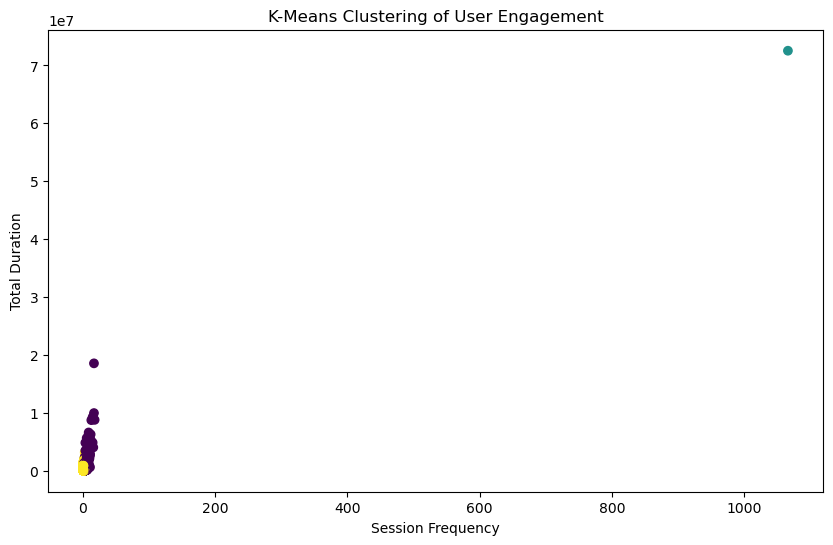

In [176]:
kmeans = KMeans(n_clusters=3, random_state=42)
engagement_metrics['Cluster'] = kmeans.fit_predict(engagement_metrics[['Session Frequency', 'Total Duration', 'Total DL', 'Total UL']])

# Scatter plot for Session Frequency and Total Duration
plt.figure(figsize=(10, 6))
plt.scatter(engagement_metrics['Session Frequency'], engagement_metrics['Total Duration'], c=engagement_metrics['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of User Engagement')
plt.xlabel('Session Frequency')
plt.ylabel('Total Duration')
plt.show()

##### **Interpretation for K-means Clustering:**

* Users have been assigned to one of the three clusters (0, 1, or 2) based on their normalized engagement metrics.

* Cluster 0: Represents users with relatively lower engagement across all metrics (session frequency, total duration, total DL, and total UL).
* Cluster 1: Represents a specific user (MSISDN/Number 41882820000) with exceptionally high engagement across all metrics, indicating a highly active user.
* Additional interpretation is needed for Cluster 2 based on the characteristics of users within this cluster.

* The clustering provides a segmentation of users based on their engagement behavior. This segmentation can guide targeted strategies for each user group.

* The optimal value of k (number of clusters) was determined as 3, based on the elbow method. This suggests that users can be reasonably grouped into three distinct levels of engagement.

##### Aggregate User Total Traffic per application

##### 

In [61]:
app_traffic = user_aggregated_data.groupby('MSISDN/Number').sum().reset_index()

In [62]:
app_traffic

,MSISDN/Number,Number of xDR sessions,Session duration,Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,1,1.167201e+08,8.426375e+08,3.605311e+07,2.206504e+06,2.563100e+04,3.337123e+06,1.051882e+06,8.374000e+05,4.939620e+05,1.490020e+07,6.724347e+06,1.026510e+07,1.691588e+07,8.110911e+08,1.367528e+06,3.770970e+08,9.473882e+06
1,3.360100e+10,1,1.812310e+08,1.207552e+08,3.610446e+07,2.598548e+06,6.201700e+04,4.197697e+06,1.137166e+06,2.828821e+06,4.789600e+05,5.324251e+06,7.107972e+06,7.705690e+05,1.045119e+07,1.050353e+08,1.471478e+07,2.795577e+08,2.152370e+06
2,3.360100e+10,1,1.349694e+08,5.566597e+08,3.930682e+07,3.148004e+06,4.761900e+04,3.343483e+06,9.964300e+04,2.436500e+06,7.688800e+05,2.137272e+06,1.919630e+07,1.652592e+07,2.827981e+06,5.290685e+08,9.759228e+06,4.950865e+08,6.607171e+06
3,3.360101e+10,1,4.987802e+07,4.019932e+08,2.032753e+07,2.514690e+05,2.882500e+04,5.937765e+06,3.740728e+06,2.178618e+06,1.060520e+05,4.393123e+06,2.584198e+06,1.157362e+06,7.847300e+05,3.880748e+08,3.051292e+06,2.524800e+07,1.003170e+07
4,3.360101e+10,2,3.710445e+07,1.363130e+09,9.428053e+07,2.861230e+06,5.131200e+04,1.372867e+07,4.770948e+06,2.247808e+06,1.057661e+06,1.033997e+07,3.119303e+07,2.497165e+07,2.423008e+07,1.308981e+09,5.816727e+06,7.776437e+08,2.716077e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106852,3.379000e+10,1,1.409887e+08,4.445751e+08,3.573224e+07,4.422140e+05,5.635500e+04,1.472406e+06,3.957299e+06,2.513433e+06,6.640000e+02,5.596862e+06,1.425471e+07,6.929961e+06,1.601099e+06,4.276202e+08,9.383076e+06,2.046361e+08,6.479040e+06
106853,4.188282e+10,1066,7.255155e+10,4.873783e+11,4.436642e+10,1.937715e+09,3.610230e+07,6.007942e+09,2.240634e+09,1.904048e+09,4.958324e+08,1.249464e+10,1.184609e+10,1.228898e+10,1.196459e+10,4.527450e+11,8.733066e+09,4.419283e+11,9.050107e+09
106854,3.197021e+12,1,8.773853e+08,1.948281e+08,3.729592e+07,6.685960e+05,4.662800e+04,8.572779e+06,1.865881e+06,8.422790e+05,6.784920e+05,9.839889e+06,2.120016e+06,1.034091e+07,1.625139e+07,1.645636e+08,1.348513e+07,4.676781e+08,2.848373e+06
106855,3.370000e+14,1,2.530302e+08,5.396350e+08,5.665284e+07,4.963370e+05,2.522900e+04,8.215537e+06,1.615080e+06,2.989663e+06,3.289190e+05,1.669073e+07,2.004421e+07,9.983678e+06,2.092136e+07,5.012590e+08,8.883653e+06,1.443541e+08,4.834382e+06


In [63]:
app_traffic['Social Media Total Bytes'] = app_traffic['Social Media DL (Bytes)'] + app_traffic['Social Media UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Social Media Total Bytes']
top_10_social_media_users = app_traffic[relevant_columns    ].nlargest(10, 'Social Media Total Bytes')


print(top_10_social_media_users)

        MSISDN/Number  Social Media Total Bytes
106853   4.188282e+10              1.973817e+09
13526    3.362632e+10              4.337478e+07
92923    3.376054e+10              3.978319e+07
37052    3.365973e+10              3.541236e+07
6437     3.361489e+10              2.829454e+07
13180    3.362578e+10              2.713550e+07
65118    3.366716e+10              2.424785e+07
106137   3.378632e+10              2.397492e+07
70960    3.366907e+10              2.380083e+07
666      3.360313e+10              2.307782e+07


In [64]:
app_traffic['Google Total Bytes'] = app_traffic['Google DL (Bytes)'] + app_traffic['Google UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Google Total Bytes']
top_10_Google_users = app_traffic[relevant_columns].nlargest(10, 'Google Total Bytes')


print(top_10_Google_users)

        MSISDN/Number  Google Total Bytes
106853   4.188282e+10        8.248577e+09
13526    3.362632e+10        1.521919e+08
13180    3.362578e+10        1.423079e+08
6437     3.361489e+10        1.279738e+08
92923    3.376054e+10        1.232231e+08
37052    3.365973e+10        1.165163e+08
106137   3.378632e+10        1.102545e+08
76363    3.367588e+10        1.098605e+08
65118    3.366716e+10        1.050327e+08
94654    3.376127e+10        9.708999e+07


In [65]:
app_traffic['Email Total Bytes'] = app_traffic['Email DL (Bytes)'] + app_traffic['Email UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Email Total Bytes']
top_10_Email_users = app_traffic[relevant_columns].nlargest(10, 'Email Total Bytes')


print(top_10_Email_users)

        MSISDN/Number  Email Total Bytes
106853   4.188282e+10       2.399880e+09
13526    3.362632e+10       4.241878e+07
6437     3.361489e+10       4.078863e+07
13180    3.362578e+10       4.063397e+07
106137   3.378632e+10       3.631012e+07
37052    3.365973e+10       3.599979e+07
92923    3.376054e+10       3.369377e+07
76363    3.367588e+10       3.151442e+07
60087    3.366546e+10       3.041788e+07
65118    3.366716e+10       3.033580e+07


In [66]:
app_traffic['Youtube Total Bytes'] = app_traffic['Youtube DL (Bytes)'] + app_traffic['Youtube UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Youtube Total Bytes']
top_10_Youtube_users = app_traffic[relevant_columns].nlargest(10, 'Youtube Total Bytes')


print(top_10_Youtube_users)

        MSISDN/Number  Youtube Total Bytes
106853   4.188282e+10         2.434073e+10
13180    3.362578e+10         4.529588e+08
92923    3.376054e+10         3.962892e+08
6437     3.361489e+10         3.943702e+08
13526    3.362632e+10         3.744830e+08
76363    3.367588e+10         3.174106e+08
65118    3.366716e+10         3.152313e+08
13994    3.362708e+10         3.087908e+08
92577    3.376041e+10         3.031691e+08
86455    3.369879e+10         3.026620e+08


In [67]:
app_traffic['Netflix Total Bytes'] = app_traffic['Netflix DL (Bytes)'] + app_traffic['Netflix UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Netflix Total Bytes']
top_10_Netflix_users = app_traffic[relevant_columns].nlargest(10, 'Netflix Total Bytes')


print(top_10_Netflix_users)

        MSISDN/Number  Netflix Total Bytes
106853   4.188282e+10         2.425357e+10
37052    3.365973e+10         3.995191e+08
6437     3.361489e+10         3.614010e+08
13180    3.362578e+10         3.569806e+08
92923    3.376054e+10         3.346433e+08
13526    3.362632e+10         3.287257e+08
92577    3.376041e+10         3.183475e+08
65118    3.366716e+10         3.139395e+08
76363    3.367588e+10         3.090932e+08
106137   3.378632e+10         3.059398e+08


In [68]:
app_traffic['Gaming Total Bytes'] = app_traffic['Gaming DL (Bytes)'] + app_traffic['Gaming UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Gaming Total Bytes']
top_10_Gaming_users = app_traffic[relevant_columns].nlargest(10, 'Gaming Total Bytes')


print(top_10_Gaming_users)

        MSISDN/Number  Gaming Total Bytes
106853   4.188282e+10        4.614780e+11
6437     3.361489e+10        7.749432e+09
92923    3.376054e+10        7.461045e+09
13180    3.362578e+10        7.326673e+09
76363    3.367588e+10        6.970568e+09
13526    3.362632e+10        6.887572e+09
37052    3.365973e+10        6.725559e+09
63028    3.366646e+10        6.646303e+09
92577    3.376041e+10        6.268620e+09
57241    3.366471e+10        6.103856e+09


In [69]:
app_traffic['Other Total Bytes'] = app_traffic['Other DL (Bytes)'] + app_traffic['Other UL (Bytes)']


relevant_columns = ['MSISDN/Number', 'Other Total Bytes']
top_10_Other_users = app_traffic[relevant_columns].nlargest(10, 'Other Total Bytes')


print(top_10_Other_users)

        MSISDN/Number  Other Total Bytes
106853   4.188282e+10       4.509784e+11
13526    3.362632e+10       8.167878e+09
6437     3.361489e+10       7.639264e+09
76363    3.367588e+10       6.798515e+09
13180    3.362578e+10       6.354583e+09
666      3.360313e+10       6.326671e+09
37052    3.365973e+10       6.317415e+09
13936    3.362695e+10       5.305448e+09
13994    3.362708e+10       5.117791e+09
94654    3.376127e+10       5.077779e+09


In [70]:
total_apps_traffic = app_traffic[['Social Media Total Bytes', 'Google Total Bytes', 'Email Total Bytes','Youtube Total Bytes','Other Total Bytes','Gaming Total Bytes', 'Netflix Total Bytes']].sum()

In [71]:
total_apps_traffic

Social Media Total Bytes    2.742394e+11
Google Total Bytes          1.171102e+12
Email Total Bytes           3.388676e+11
Youtube Total Bytes         3.396545e+12
Other Total Bytes           6.440523e+13
Gaming Total Bytes          6.455040e+13
Netflix Total Bytes         3.394314e+12
dtype: float64

#### Top 10 Most Engaged Users per Application

In [72]:
top_3_apps_traffic = app_traffic[['Social Media Total Bytes', 'Google Total Bytes', 'Email Total Bytes','Youtube Total Bytes','Other Total Bytes','Gaming Total Bytes', 'Netflix Total Bytes']].sum().nlargest(3)

In [73]:
top_3_apps_traffic

Gaming Total Bytes     6.455040e+13
Other Total Bytes      6.440523e+13
Youtube Total Bytes    3.396545e+12
dtype: float64

##### Interpretation 

* Gaming Application:

The gaming application has the highest total bytes, indicating that it is the most data-intensive app among the top three. Users are consuming a significant amount of data on gaming activities.

* Other Applications:

The "Other" category ranks closely in terms of total bytes, suggesting a diverse set of applications within this group. Further analysis is needed to understand the specific apps contributing to this category.

* Youtube Application:

The Youtube application has a substantial but comparatively lower total bytes. While it may not be the most data-intensive, it remains a significant contributor to overall data usage.

##### Implications for Telecom Providers:

* Telecom providers should consider optimizing network resources to ensure a smooth experience for users engaged in gaming, as it requires high data bandwidth.
* Understanding the composition of the "Other" category is crucial. Providers can tailor their services or marketing strategies based on the popularity of specific apps within this diverse group.
* Youtube remains a prominent application, and providers may explore partnerships or promotions to enhance user engagement on this platform.

##### User Preferences:

* Analyzing the data consumption patterns of these top applications provides insights into user preferences. Telecom providers can leverage this information for targeted service improvements and content optimization.

##### Continuous Monitoring:

* Regularly monitoring app usage patterns is essential to adapt to changing user behaviors. This ensures that network resources are efficiently allocated to meet user demands for specific applications.


##### Plot for Top 3 Most Used Application

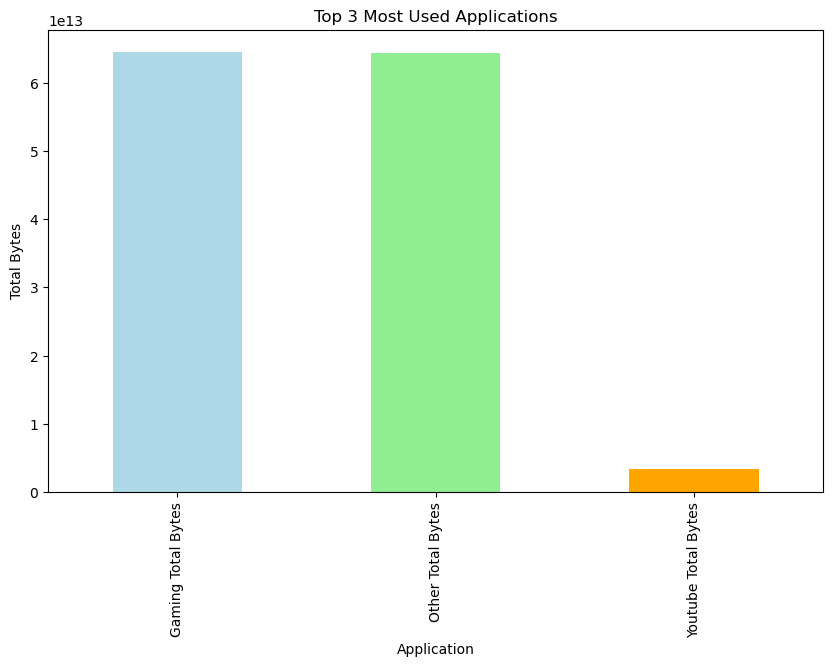

In [74]:
plt.figure(figsize=(10, 6))
top_3_apps_traffic.plot(kind='bar', color=['lightblue', 'lightgreen', 'orange'])
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Bytes')
plt.show()

##### Conclusion

* The tallest bar represents the gaming application, indicating it has the highest total bytes among the top 3. Users heavily engage with gaming activities, contributing significantly to data consumption.

* The second tallest bar represents the "Other" category, reflecting a diverse set of applications. While not as data-intensive as gaming, it is a substantial contributor to overall usage.

* The shortest bar represents the Youtube application, indicating lower total bytes compared to gaming and the "Other" category. While it may not be the most data-intensive, it remains a prominent application in terms of data consumption.

* Gaming stands out as the most resource-intensive application, potentially influencing network resource allocation strategies for telecom providers.

* The "Other" category's significance emphasizes the need for a nuanced understanding of various applications within this group.

* Telecom providers can tailor their strategies based on the popularity of specific applications. They may offer gaming-centric data plans or promotions to capitalize on the high demand for gaming data.

### K Mean Cluster

In [130]:
scaler = StandardScaler()
engagement_data_scaled = scaler.fit_transform(engagement_metrics)

wcss = []

for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(engagement_data_scaled)
    wcss.append(kmeans.inertia_)

kmeans

/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/j

KMeans(n_clusters=10, random_state=42)

In [131]:
engagement_data_scaled

array([[-3.98481361e-03, -1.20343560e-01, -1.04071046e-01,
         1.31061943e-01, -1.54617621e-01, -3.18255350e-01],
       [-3.98481360e-03, -1.20343560e-01,  1.18789719e-01,
        -3.31744111e-01, -1.54251243e-01, -3.18255350e-01],
       [-3.98481334e-03, -1.20343560e-01, -4.10267724e-02,
        -5.22813274e-02, -1.31403102e-01, -3.18255350e-01],
       ...,
       [ 1.09085281e+00, -1.20343560e-01,  2.52377555e+00,
        -2.84255241e-01, -1.45750467e-01,  3.14221903e+00],
       [ 1.16617756e+02, -1.20343560e-01,  3.66835029e-01,
        -6.31960212e-02, -7.64307211e-03, -3.18255350e-01],
       [ 3.05375890e+02, -1.20343560e-01,  2.49772389e+00,
        -3.58707656e-01,  1.94919946e-02,  3.14221903e+00]])

### Plot the elbow curve


/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jagsanad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/j

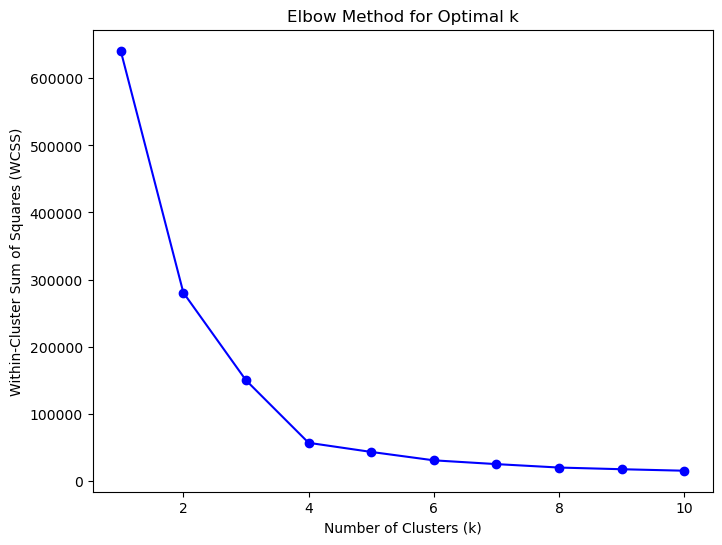

In [75]:

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

### Elbow Method Overview:

The elbow method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (k) and looking for the "elbow" point where the rate of decrease in WCSS slows down.
Observations from the Plot:

* The elbow curve starts above the X-axis, indicating a relatively high WCSS value for a single cluster.

* The first noticeable dot is at k=2, and the WCSS decreases significantly, suggesting a potential elbow point.

* Subsequent dots at k=3 and k=4 continue to show a decrease in WCSS, but the rate of decrease slows down.
The dots beyond k=4 indicate diminishing returns in terms of reducing WCSS.

##### Interpretation:

* The "elbow" in the plot occurs around k=2, suggesting that adding more clusters beyond this point provides diminishing improvements in terms of reducing within-cluster variability.
* The subsequent dots at k=3 and k=4 still contribute to reducing WCSS but at a slower rate, indicating less significant improvement compared to the initial clusters.

##### Conclusion:

* Based on the elbow method, the optimal number of clusters (k) for the engagement metrics dataset appears to be 2. This is the point where the reduction in within-cluster variability starts to diminish.

* While k=3 and k=4 are potential options, the diminishing returns in WCSS reduction suggest that a simpler model with fewer clusters (k=2) might be more interpretable and practical.




In [79]:
engagement_metrics = pd.DataFrame(engagement_metrics)

csv_file_path = 'engagement_metrics.csv'

# Save DataFrame to CSV
engagement_metrics.to_csv(csv_file_path, index=False)

print(f'Data exported to {csv_file_path}')

Data exported to engagement_metrics.csv
